In [6]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd


JSONDecodeError: Expecting value: line 39 column 1 (char 868)

In [25]:
import math
import cufflinks as cf
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
data = pd.read_csv('benchmarkresult2.csv')
print(data[data["tris"]=="MERGE_SORT"])
data["size"] = data["size"].apply(lambda x : math.log(x))
data["time"] = data["time"].apply(lambda x : math.log(x))
init_notebook_mode(connected = True)
cf.go_offline()
tris = set(data["tris"])
scatter = []
for t in ["RANDOM","INVERSE", "ORDERED"]:
    xTime = []
    ySize = []
    temp = data.loc[data["type"] == t]
    #temp.iplot(kind='scatter',  x="time", y="size", labels="tris", world_readable=True)
    iplot(
    {
        'data': [
            {
                'x': data[(data['type']==t) & (data['tris']==tri)]['time'],
                'y': data[(data['type']==t) & (data['tris']==tri)]['size'],
                'name': tri, 'mode': 'lines+markers',
            } for tri in tris
        ],
        'layout': {
            'title': {'text': 'Liste type : '+t},
            'xaxis': {'title': 'Temps (ms)' },
            'yaxis': {'title': "Nombre d'élément"}
        }
})
    #for tri in tris:
        #temp2 = temp.loc[temp["tris"]==tri]
        #xTime.append(np.log(temp2["time"]))
        #ySize.append(np.log(temp2["size"]))
        #plt.scatter(xTime, ySize)

        
        

           tris     type     size        time
126  MERGE_SORT   RANDOM        1    0.000174
127  MERGE_SORT   RANDOM        2    0.000612
128  MERGE_SORT   RANDOM        4    0.000862
129  MERGE_SORT   RANDOM        8    0.001567
130  MERGE_SORT   RANDOM       16    0.003542
131  MERGE_SORT   RANDOM       32    0.006911
132  MERGE_SORT   RANDOM       64    0.013380
133  MERGE_SORT   RANDOM      128    0.027562
134  MERGE_SORT   RANDOM      256    0.051667
135  MERGE_SORT   RANDOM      512    0.105293
136  MERGE_SORT   RANDOM     1024    0.203730
137  MERGE_SORT   RANDOM     2048    0.411726
138  MERGE_SORT   RANDOM     4096    1.006190
139  MERGE_SORT   RANDOM     8192    1.699380
140  MERGE_SORT   RANDOM    16384    3.411320
141  MERGE_SORT   RANDOM    32768    6.990310
142  MERGE_SORT   RANDOM    65536   14.317200
143  MERGE_SORT   RANDOM   131072   29.126600
144  MERGE_SORT   RANDOM   262144   58.812300
145  MERGE_SORT   RANDOM   524288  119.005000
146  MERGE_SORT   RANDOM  1048576 



Tris :  INSERTION_SORT  Type :  RANDOM
a :  0.6123090472367264
b :  7.457150723055265


Tris :  QUICK_SORT  Type :  RANDOM
a :  1.0167657014466136
b :  10.01295210930231


Tris :  SELECTION_SORT  Type :  RANDOM
a :  0.6460988306672293
b :  6.967520813470612


Tris :  NATIVE_SORT  Type :  RANDOM
a :  1.0596353016493445
b :  10.193789295391827


Tris :  COUNTING_SORT  Type :  RANDOM
a :  1.8471424303637742
b :  11.130752267347347


Tris :  HEAP_SORT  Type :  RANDOM
a :  0.9838441643424497
b :  9.673616200432551


Tris :  MERGE_SORT  Type :  RANDOM
a :  1.046805329622246
b :  8.512411069288792


Tris :  INSERTION_SORT  Type :  INVERSE
a :  1.4221485445951048
b :  16.000625428951327


Tris :  QUICK_SORT  Type :  INVERSE
a :  1.0815303554096194
b :  11.92335980883908


Tris :  SELECTION_SORT  Type :  INVERSE
a :  0.6110711547084838
b :  7.325883315704489


Tris :  NATIVE_SORT  Type :  INVERSE
a :  1.457716711786099
b :  14.82461437439239


Tris :  COUNTING_SORT  Type :  INVERSE
a :  2.016

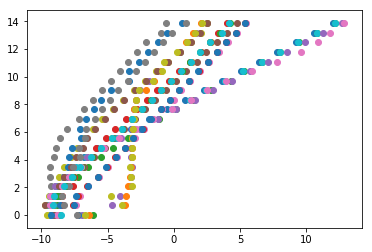

In [32]:

for t in ["RANDOM","INVERSE", "ORDERED"]:
    xTime = []
    ySize = []
    fig = None
    for tri in tris:
        temp = data.loc[(data["type"] == t) & (data["tris"] == tri)]
        xTime = list(temp['time'])
        ySize = list(temp['size'])
        plt.scatter(xTime, ySize)
        a = np.cov(xTime, ySize)[0][1]/np.var(xTime)
        b = np.mean(ySize)-a*np.mean(xTime)
        print("\n\nTris : ", tri, " Type : ", t)
        print("a : ",a)
        print("b : ",b)
        fig = go.Figure(data=go.Scatter(x=x, y=x**2))
    fig.show()